# Regularized Linear Regression

In the first half of the exercise, you will implement regularized linear regression to predict the amount of water flowing out of a dam using the change of water level in a reservoir. In the next half, you will go through some **diagnostics of debugging learning algorithms** and examine the **effects of bias v.s. variance.**<br><br>
In the following parts, you will implement linear regression and use that to fit a **straight line** to the data and plot learning curves. Following that, you will implement **polynomial regression** to find a **better fit** to the data.

The file <strong><em>ex5data1</em></strong> contains a data set which includes train set, test set, validation set.<br>
The structure of the dataset described blow:<br>
1. x = **Water level (a single feature)**
2. y = **Value of flowed water**
3. xval = **x validation set**
4. yval = **y validation set**
5. xtest = **x test set**
6. ytest = **y test set**


<br><br>
<strong>
Our assignment has these sections:
1. Visualizing the Data
    1. Converting .mat to .csv
    2. Loading Dataset
    3. Visualizing The Dataset
2. Regularized Linear Regression Cost Function
3. Regularized Linear Regression Gradient
4. Fitting Linear Regression
    
</strong>

In each section full description provided.

## 1. Visualizing the Dataset
Before starting on any task, it is often useful to understand the data by visualizing it.<br>

### 1.A Converting .mat to .csv
In this specific assignment, the instructor added a .mat file as training set and weights of trained neural network. But we have to convert it to .csv to use in python.<br>
After all we now ready to import our new csv files to pandas dataframes and do preprocessing on it and make it ready for next steps.

In [1]:
# import libraries
import scipy.io
import numpy as np

data = scipy.io.loadmat("ex5data1")

Now we **extract** `x`, `y`, `xval`, `yval`, `xtest` and `ytest`</strong> variables from the .mat file and save them into .csv file for further usage. After running the below code you should see:
1. X.csv
2. y.csv 
3. Xtest.csv
4. ytest.csv
5. Xval.csv
6. yval.csv

files in your directory.

In [2]:
for i in data:
    if '__' not in i and 'readme' not in i:
        np.savetxt((i+".csv"),data[i],delimiter=',')

### 1.B Loading Dataset
First we import .csv files into pandas dataframes then save them into numpy arrays.<br><br>

In [3]:
# import library
import pandas as pd

# saving .csv files to pandas dataframes
x_df = pd.read_csv('X.csv',names= ['x'])
xtest_df = pd.read_csv('Xtest.csv',names= ['xtest'])
xval_df = pd.read_csv('Xval.csv',names= ['xval'])
y_df = pd.read_csv('y.csv',names=['y'])
ytest_df = pd.read_csv('ytest.csv',names= ['ytest'])
yval_df = pd.read_csv('yval.csv',names= ['yval'])

In [7]:
x_df.head(3)

,x
0,-15.936758
1,-29.152979
2,36.189549


In [8]:
y_df.head(3)

,y
0,2.134311
1,1.173257
2,34.359109


Now we convert all **pandas dataframes** to **numpy arrays** for calculations.

In [10]:
# saving x, y, xval, yval, xtest and ytest into numpy arrays
x = x_df.iloc[:,:].values
xval = xval_df.iloc[:,:].values
xtest = xtest_df.iloc[:,:].values

y = y_df.iloc[:,:].values
yval = yval_df.iloc[:,:].values
ytest = ytest_df.iloc[:,:].values


m, n = x.shape
m_val = xval.shape[0]
m_test = xtest.shape[0]

print('#{} Number of training samples, #{} features per sample'.format(m,n))
print('#{} Number of validation samples, #{} features per sample'.format(m_val,n))
print('#{} Number of test samples, #{} features per sample'.format(m_test,n))

#12 Number of training samples, #1 features per sample
#21 Number of validation samples, #1 features per sample
#21 Number of test samples, #1 features per sample


### 1.C Ploting Dataset
We will begin by visualizing the dataset containing historical records on **the change in the water level**, `x`, and **the amount of water flowing out of the dam**, `y`.<br><br>
This dataset is divided into three parts:<br>
    • A **training set** that your model will learn on: `x`, `y`<br>
    • A **cross validation set** for determining the regularization parameter: `xval`, `yval`<br>
    • A **test set** for evaluating performance. These are **"unseen" examples** which your model did not see during training: `xtest`, `ytest`<br>

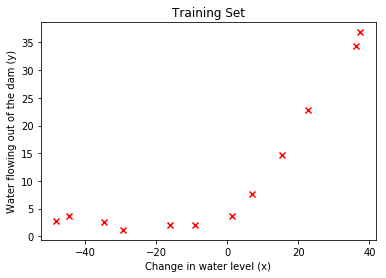

In [27]:
# import libraries
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(x, y, color='red', marker='x')
plt.title('Training Set')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show()